# Project: Investigating the Soccer Database from Kaggle

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



## Dataset
* The dataset chosen here is the Soccer Database. I chose this dataset because I enjoy football a lot.
* This football database comes from Kaggle and it contains data for football matches, players and teams from several European countries from 2008 t0 2016.
* The dataset is stored in a SQLite database which will be accessed using SQL queries.
* The goal of this project is to investigate the dataset by asking relevant questions, Wrangle the data, perform the Exploratory Data Analysis, Draw conclusions on the data and the communicate the results in this ipython Notebook.
* We will work on the season 2014/2015 because, this is the season in which I watched the most football of my life.
* Generally, bookies use the data collected from last 10 matches in order to perform their predictions on the results of the following matches.

### Questions
> 1.  Which team dominated the standings overall in the season 2014/2015?
> 2.  Does playing home increases the chances of winning in the season 2014/2015?
> 3.  What is the highest rated team?
> 4.  What is the a correlation between the rating and the performance of the team overall in the season 2014/2015?

In [1302]:


import math
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from IPython.display import display_html 

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

<h5><font color='yellow'>Methodology</font></h2>

> * I will explore the data going through table names. Starting with the first table as it is in the database.
> * I will check for null or duplicate values and drop them in the cleaning step if I find any.


### General Properties

In [1303]:
database = 'database.sqlite'
data = sql.connect(database)



In [1304]:
# Country Table
query = '''select * from Country'''
country = pd.read_sql_query(query, data)
display_html(country.head())
country.info()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [1305]:
# Check for null values
print("Null -> \n",country.isna().sum())

# Check if there are duplicates
print("Duplicates -> \n",country.duplicated().sum())

Null -> 
 id      0
name    0
dtype: int64
Duplicates -> 
 0


In [1306]:
# League Table
query = '''select * from League'''
league = pd.read_sql_query(query, data)
display_html(league.head())
league.info()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [1307]:
# Check for null values
print("Null -> \n",league.isna().sum())

# Check if there are duplicates
print("Duplicates -> \n",league.duplicated().sum())

Null -> 
 id            0
country_id    0
name          0
dtype: int64
Duplicates -> 
 0


In [1308]:
# Defining a custom styler to display the pandas dataframes side by side.
t1 = country.head().style.set_table_attributes("style='display:inline'").set_caption('Country')
t2 = league.head().style.set_table_attributes("style='display:inline'").set_caption('League')


display_html(t1._repr_html_() + t2._repr_html_(), raw=True)

Country 
 
 
   
 id 
 name 
 
 
 
 
 0 
 1 
 Belgium 
 
 
 1 
 1729 
 England 
 
 
 2 
 4769 
 France 
 
 
 3 
 7809 
 Germany 
 
 
 4 
 10257 
 Italy 
 
 
 

 
 League 
 
 
   
 id 
 country_id 
 name 
 
 
 
 
 0 
 1 
 1 
 Belgium Jupiler League 
 
 
 1 
 1729 
 1729 
 England Premier League 
 
 
 2 
 4769 
 4769 
 France Ligue 1 
 
 
 3 
 7809 
 7809 
 Germany 1. Bundesliga 
 
 
 4 
 10257 
 10257 
 Italy Serie A

<h5><font color='orange'>Observations</font></h5>

> * I noticed that the id column of the league table and contains the same ids as the country_id column in this table. This tells us that there is only one league per country. Thus it makes sense to merge the country and the league table. While doing this, I will also delete the country_id column since it will be redundant and no longer needed.

In [1309]:
# Match table
query = '''select * from Match where season="2014/2015"'''
match = pd.read_sql_query(query, data)
display_html(match.head())
match.info()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1249,1,1,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,...,7.00,1.33,4.8,8.00,None,None,None,None,None,None
1,1250,1,1,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,...,1.83,4.20,3.6,1.80,None,None,None,None,None,None
2,1251,1,1,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,...,1.95,3.75,3.5,1.95,None,None,None,None,None,None
3,1252,1,1,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,...,2.88,2.38,3.2,2.90,None,None,None,None,None,None
4,1253,1,1,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,...,2.25,3.00,3.4,2.25,None,None,None,None,None,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325 entries, 0 to 3324
Columns: 115 entries, id to BSA
dtypes: float64(46), int64(53), object(16)
memory usage: 2.9+ MB


In [1310]:
# Check for null values
print("Null -> \n",match.isna().sum())

# Check if there are duplicates
print("Duplicates -> \n",match.duplicated().sum())



Null -> 
 id               0
country_id       0
league_id        0
season           0
stage            0
              ... 
GBD           3325
GBA           3325
BSH           3325
BSD           3325
BSA           3325
Length: 115, dtype: int64
Duplicates -> 
 0


<h5><font color='orange'>Observations</font></h5>

> * The match table contains a lot of columns. *115* to be precise. Since I decided to go with the *2014/2015* season, I filtered it directly in the SQL query.
> * According to the documentation on the data, the columns  `85 - 114` represents the betting odds. I don't need this to determine the outcome of a match, so they will be dropped.
> * According to the documentation, the columns `11 - 54` represents the positions of players in the match. We do not need this in order to know the outcome of a match, so they will be dropped.
> * Looking at the *goal* column, we see that the information in that column is using the XML format. There are some other columns using this format too. For our analysis, we don't need that extra information so they will be dropped.
> * country_id and league_id contains the same values. So we will drop the country id and keep league id.
> * Convert respective ids with their actual names to ease visualization.

In [1311]:
# Player Table
query = '''select * from Player'''
player = pd.read_sql_query(query, data)
display_html(player.head())
player.info()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [1312]:
# Check for null values
print("Null -> \n",player.isna().sum())

# Check if there are duplicates
print("Duplicates -> \n",player.duplicated().sum())

Null -> 
 id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64
Duplicates -> 
 0


<h5><font color='orange'>Observations</font></h5>

> * The Player table contains information on the different player.
> * Here we don't need the information in columns like *player_fifa_api_id ,birthday, height and weight.*
> * We will merge this table with the player attributes table in order to have all the information in one place.

In [1313]:
# Player Attributes Table
query = '''select * from Player_Attributes'''
player_attrib = pd.read_sql_query(query, data)
display_html(player_attrib.head())
player_attrib.info()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [1314]:
# Check for null values
print("Null -> \n",player_attrib.isna().sum())

# Check if there are duplicates
print("Duplicates -> \n",player_attrib.duplicated().sum())

Null -> 
 id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_t

<h5><font color='orange'>Observations</font></h5>

> * The Player_Attributes table contains information on the different skills a player posseses.
> * According to **question 3**, we will only consider the overall_rating of all players in a team. Thus dropping all the other columns execpt the id and the date.
> * There are multiple entries for the same players over multiple seasons. But, since we are only considering the season 2014/2015, we will only limit our query to values where the date is between 2014/2015.
> * We will drop all the null values in this table.

In [1315]:
# Team Table
query = '''select * from Team'''
team = pd.read_sql_query(query, data)
display_html(team.head())
team.info()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [1316]:
# Check for null values
print("Null -> \n",team.isna().sum())

# Check if there are duplicates
print("Duplicates -> \n",team.duplicated().sum())

Null -> 
 id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64
Duplicates -> 
 0


<h5><font color='orange'>Observations</font></h5>

> * The column *team_fifa_api_id* ia of no use to us so we will drop it.

In [1317]:
# Team Attribute Table
query = '''select * from Team_Attributes'''
team_attrib = pd.read_sql_query(query, data)
display_html(team_attrib.head())
team_attrib.info()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [1318]:
# Check for null values
print("Null -> \n",team_attrib.isna().sum())

# Check if there are duplicates
print("Duplicates -> \n",team_attrib.duplicated().sum())

Null -> 
 id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64
Duplicates -> 
 0


<h5><font color='orange'>Observations</font></h5>

> * According to **question 1**, the team performance during the season is determined by the wins.
> * Using the percentage of over the whole season per league, we will be able to also answer **question 4**
>* Thus, the for the purpose of our analysis, this table will not matter, so we will not use it.

<h5><font color='brown'>Global Observations</font></h5>

> * According to the documentation, the columns containing *fifa_api_id* are used as the id for the FIFA game series. In this database, it is the columns listed without *fifa_api_id* that are used as a foreign keys for on other tables. So we will drop the columns named *\*_fifa_api_id*


### Data Cleaning [*country + league, match, player, player_attrib, team, team_attrib*]

In [1319]:
# Merging the country and league dataframes
df_league = league.merge(country, on='id', how='inner', suffixes=('_l','_c'))
df_league.drop('country_id', axis=1, inplace=True)
display_html(df_league.head(1))

,id,name_l,name_c
0,1,Belgium Jupiler League,Belgium


* I merged the country and the league data frame. The league name column has been renamed to *name_l* and the country name column has been renamed to *name_c*.

In [1320]:
# Cleaning player attributes dataframe
df_player_attrib = player_attrib
df_player_attrib = df_player_attrib[(df_player_attrib['date'].str.contains('2014'))|(df_player_attrib['date'].str.contains('2015'))]

# Droping all the date column and others
df_player_attrib = df_player_attrib.filter(['id', 'player_api_id', 'overall_rating'])

# Checking if there are duplicate players with the same rating
duplicate = df_player_attrib[df_player_attrib.duplicated(subset=['player_api_id', 'overall_rating'], keep='first')]

# Dropping the duplicates
df_player_attrib =df_player_attrib.drop_duplicates(keep='first')
# df_player_attrib.duplicated().sum() # Checking if all the duplicates have been dropped

# Finding the average rating of each player over the season and dropping nulls when computing the average if any.
df_player_attrib = df_player_attrib.groupby('player_api_id', as_index=False,dropna=True)['overall_rating'].mean()
df_player_attrib


,player_api_id,overall_rating
0,2625,61.000000
1,2752,71.500000
2,2768,74.500000
3,2796,67.000000
4,2802,76.000000
...,...,...
8518,719413,63.000000
8519,721133,67.666667
8520,722766,59.285714
8521,744907,51.571429


> * The player attributes dataframe has been cleaned by selecting the ratings valid only for the season 2014/2015 using the date column. 
> * All the other unecessary columns were dropped since we determined that only the overall rating will be a valid metric for measuring the players performance.
> * I made sure to remove all the duplicate players according to their id and rating. i.e: if the same player has the same overall rating more than 1 times, then he has a duplicate. So we remove the duplicate
> * I then computed the average rating over the year for each player by using all the different ratings he had in the database.
> *  I will now merge the player attribute dataframe with the player dataframe as mentioned in our observation above.

In [1321]:
df_player = player.filter(['player_api_id', 'player_name'])
df_player = df_player.merge(df_player_attrib, on='player_api_id', how='inner')
df_player

,player_api_id,player_name,overall_rating
0,505942,Aaron Appindangoye,63.333333
1,155782,Aaron Cresswell,71.583333
2,162549,Aaron Doran,67.428571
3,30572,Aaron Galindo,67.600000
4,23780,Aaron Hughes,70.500000
...,...,...,...
8518,99031,Zoran Tosic,78.400000
8519,192132,Zouhaier Dhaouadhi,64.000000
8520,282473,Zouhair Feddal,65.785714
8521,26357,Zoumana Camara,73.000000


> * The player table was trimmed to include only the necessary columns
> * I then merged the player with his attributes. Note that the inner join excludes players with missing ratings

In [1322]:
# Dropping the unecessary column in team
df_team = team.drop('team_fifa_api_id', axis=1, inplace=False)
# Freeing the memory since this will not be used
team_attrib=None

df_team

,id,team_api_id,team_long_name,team_short_name
0,1,9987,KRC Genk,GEN
1,2,9993,Beerschot AC,BAC
2,3,10000,SV Zulte-Waregem,ZUL
3,4,9994,Sporting Lokeren,LOK
4,5,9984,KSV Cercle Brugge,CEB
...,...,...,...,...
294,49479,10190,FC St. Gallen,GAL
295,49837,10191,FC Thun,THU
296,50201,9777,Servette FC,SER
297,50204,7730,FC Lausanne-Sports,LAU


In [1323]:
# Dropping the player positions columns
idx = match.columns.get_loc('home_player_X1')
idx1 = match.columns.get_loc('away_player_Y11')
df_match = match.drop(match.iloc[:,idx:idx1+1], axis=1, inplace=False)
# Dropping the betting odds columns
idx = match.columns.get_loc('B365H')
idx1 = match.columns.get_loc('BSA')
df_match.drop(match.iloc[:,idx:idx1+1], axis=1, inplace=True)
# Dropping the XML columns
idx = df_match.columns.get_loc('goal')
df_match.drop(df_match.iloc[:,idx:], axis=1, inplace=True)
# Dropping country_id and merging the league_id to get league names
df_match.drop('country_id', axis=1, inplace=True)
df_match = df_match.merge(df_league[['id','name_l','name_c']], left_on='league_id', right_on='id', how='left').drop(columns=['id_y','league_id']).rename(columns={'id_x':'id', 'name_l':'league_name', 'name_c':'country_name'})
# Merge team names
df_match = df_match.merge(df_team[['team_api_id','team_long_name']], left_on='home_team_api_id', right_on='team_api_id', how='left').drop(columns=['team_api_id']).rename(columns={'team_long_name':'home_team_name'})
df_match = df_match.merge(df_team[['team_api_id','team_long_name']], left_on='away_team_api_id', right_on='team_api_id', how='left').drop(columns=['team_api_id']).rename(columns={'team_long_name':'away_team_name'})
df_match


,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,league_name,country_name,home_team_name,away_team_name
0,1249,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,0,20747.0,...,166679.0,239599.0,179059.0,521204.0,240478.0,97699.0,Belgium Jupiler League,Belgium,Standard de Liège,Sporting Charleroi
1,1250,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,2,208699.0,...,179310.0,26440.0,39962.0,14557.0,465726.0,259507.0,Belgium Jupiler League,Belgium,Waasland-Beveren,Club Brugge KV
2,1251,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,0,67949.0,...,39625.0,280443.0,208929.0,40521.0,79247.0,289248.0,Belgium Jupiler League,Belgium,KSV Cercle Brugge,KAA Gent
3,1252,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,0,270473.0,...,131531.0,201811.0,38365.0,45490.0,265123.0,148329.0,Belgium Jupiler League,Belgium,Lierse SK,KV Oostende
4,1253,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,0,346114.0,...,67898.0,38290.0,203666.0,NaN,212285.0,38777.0,Belgium Jupiler League,Belgium,KVC Westerlo,Sporting Lokeren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,25795,2014/2015,9,2014-09-23 00:00:00,1717254,9931,9824,3,1,156175.0,...,56868.0,42237.0,113422.0,32343.0,92094.0,271684.0,Switzerland Super League,Switzerland,FC Basel,FC Vaduz
3321,25796,2014/2015,9,2014-09-23 00:00:00,1717255,10191,10199,3,2,67311.0,...,201704.0,95220.0,114790.0,104646.0,95257.0,34082.0,Switzerland Super League,Switzerland,FC Thun,FC Luzern
3322,25797,2014/2015,9,2014-09-24 00:00:00,1717256,10190,9956,3,0,42231.0,...,127224.0,42527.0,147959.0,289472.0,80564.0,118359.0,Switzerland Super League,Switzerland,FC St. Gallen,Grasshopper Club Zürich
3323,25798,2014/2015,9,2014-09-24 00:00:00,1717257,10243,9930,0,0,41722.0,...,41602.0,210952.0,25835.0,103846.0,67360.0,67003.0,Switzerland Super League,Switzerland,FC Zürich,FC Aarau


> * I created a trimmed down copy of the original match dataframe called *df_match*.
> * In this new dataframe, all the columns that were not inline with my approach were dropped. i.e: **player postitions**, **betting odds**, **XML columns**
> * In the EDA, I will augment the dataframe to with 3 columns (*W1*, *X*, *W2*) to contain the result of the match. i.e: If home team wins it *W1* will be 1, if away team wins *w2* will be 1 and if its a draw *X* will be 1.  

In [1324]:
# This function can be called anywhere to rearrange columns
def rearrangeColumns(df):
    df = df.reindex(columns=sorted(df.columns))
    return df

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which team dominated the standings overall in the season 2014/2015?)

> * To find out how is the outcome of a match determined, we will have to augment the match dataframe.
> * The team with the highest number of goals win. We can summarize this by adding 3 columns containing the outcome of the match;
   > - W1 for home team win.
   > - W2 for away team win.
   > - X for draw.
> * We will then investigate if other attributes like overall ratings of all players on a team leads them to winning more matches or not.alkjdlkasjdlkjalskd
> * Then we will decide what is the best measure for the outcome of the match between all of these. 

In [1325]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Augmenting the match data by adding 3 coulumns representing the results of the matches
df_match['W1'] = 0
df_match['W2'] = 0
df_match['X'] = 0
df_match.loc[df_match['home_team_goal']>df_match['away_team_goal'], 'W1'] = 1
df_match.loc[df_match['home_team_goal']<df_match['away_team_goal'], 'W2'] = 1
df_match.loc[df_match['home_team_goal']==df_match['away_team_goal'], 'X'] = 1
df_match['W1'] = df_match['W1'].fillna(0)
df_match['W2'] = df_match['W2'].fillna(0)
df_match['X'] = df_match['X'].fillna(0)
df_match.head()

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_9,away_player_10,away_player_11,league_name,country_name,home_team_name,away_team_name,W1,W2,X
0,1249,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,0,20747.0,...,521204.0,240478.0,97699.0,Belgium Jupiler League,Belgium,Standard de Liège,Sporting Charleroi,1,0,0
1,1250,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,2,208699.0,...,14557.0,465726.0,259507.0,Belgium Jupiler League,Belgium,Waasland-Beveren,Club Brugge KV,0,1,0
2,1251,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,0,67949.0,...,40521.0,79247.0,289248.0,Belgium Jupiler League,Belgium,KSV Cercle Brugge,KAA Gent,0,0,1
3,1252,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,0,270473.0,...,45490.0,265123.0,148329.0,Belgium Jupiler League,Belgium,Lierse SK,KV Oostende,1,0,0
4,1253,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,0,346114.0,...,NaN,212285.0,38777.0,Belgium Jupiler League,Belgium,KVC Westerlo,Sporting Lokeren,1,0,0


> To answer this question, a few things must be known first.
> * How many matches did each team play in the season? *home_games + away_games*

In [1326]:
# We get the matches played home and those away. Then we compute the median
matches_played_home = df_match.groupby('home_team_name')['home_team_name'].count()
matches_played_away = df_match.groupby('away_team_name')['away_team_name'].count()
matches_played = matches_played_home + matches_played_away
matches_played.median()


36.0

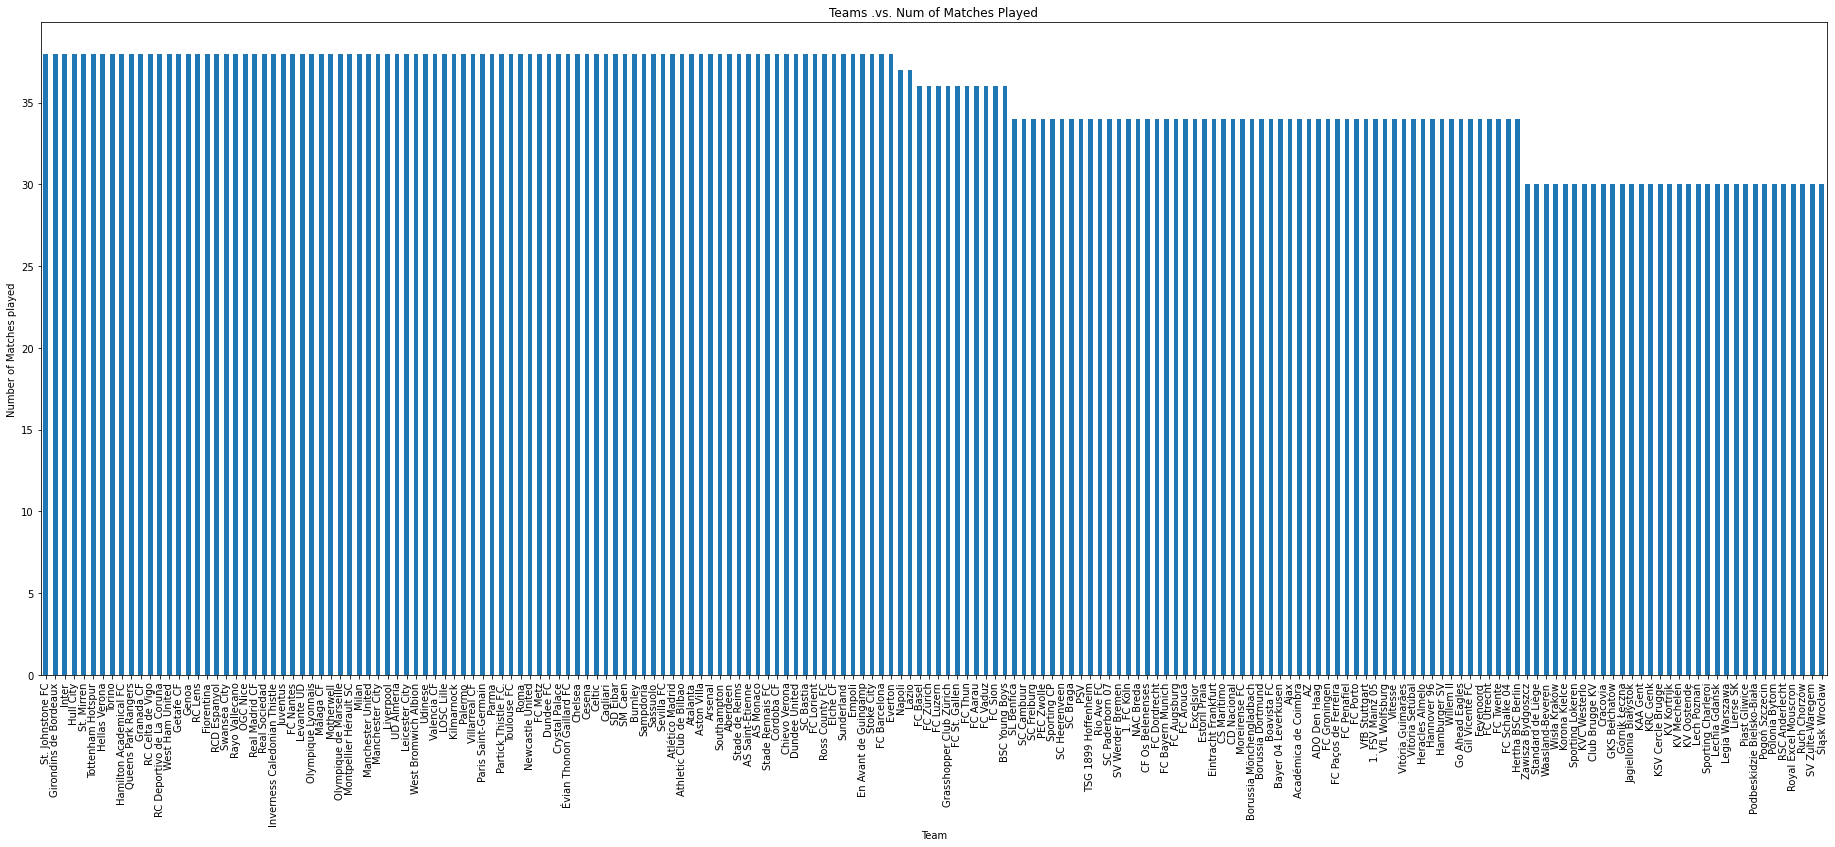

In [1327]:

matches_played.sort_values(ascending=False).plot(kind='bar', figsize=(32,12))
plt.title('Teams .vs. Num of Matches Played')
plt.xlabel('Team')
plt.ylabel('Number of Matches played');


<h5><font color='blue'>Observations</font></h5>

> * We can see from here that there are `188` teams here and the median of match played = `36.0`
> * Lets see how many matches were won by each team in the season *(Home win + Away Win)* **W1 + W2**

Text(0, 0.5, 'Team')

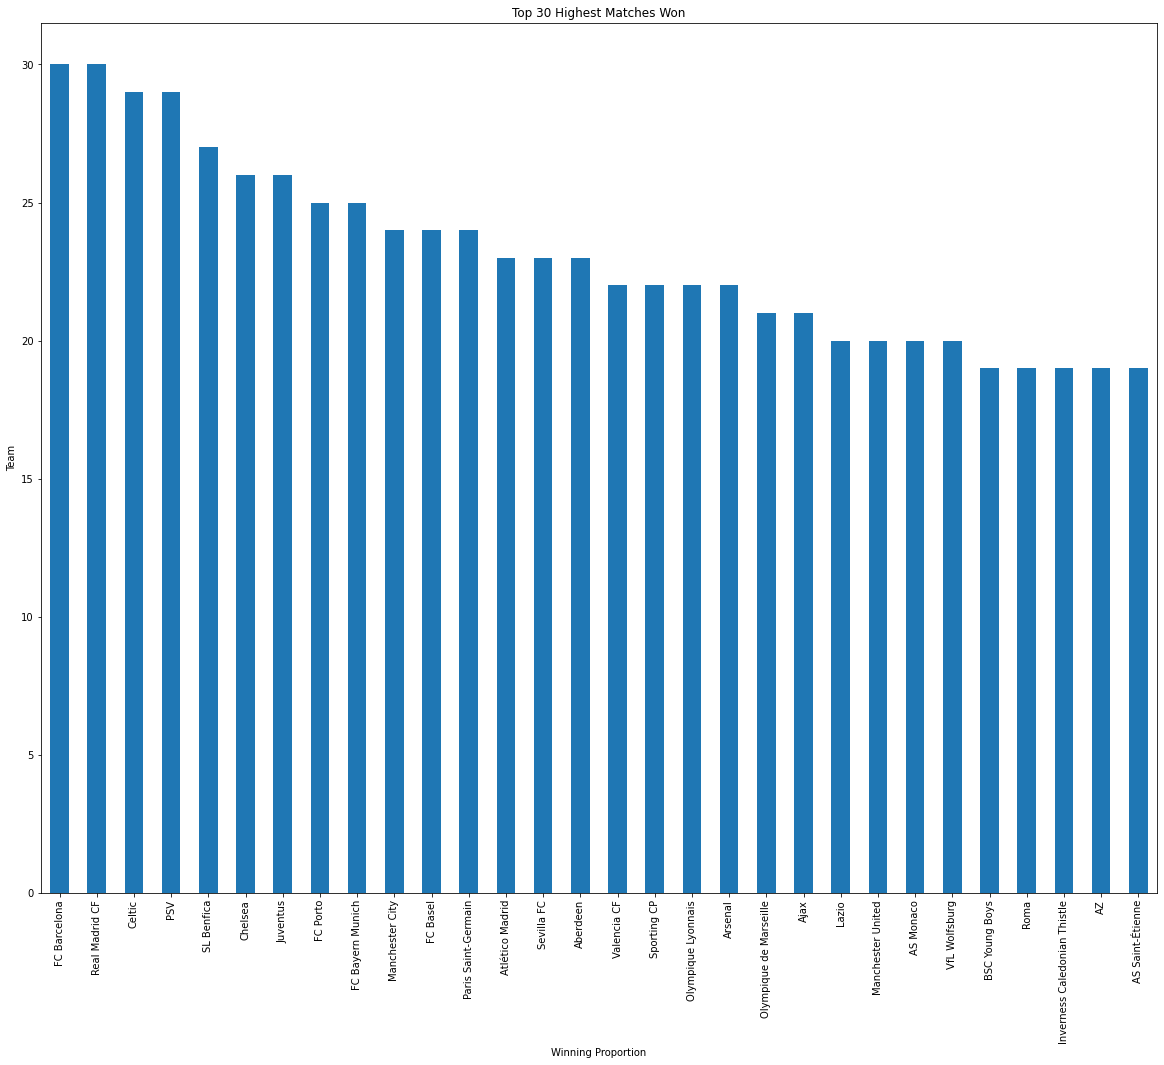

In [1328]:
# Total number of matches Won
home_winsn = df_match.groupby('home_team_name')['W1'].sum()
away_winsn = df_match.groupby('away_team_name')['W2'].sum()

winsn = home_winsn+away_winsn

winsn.sort_values(ascending=False).head(30).plot(kind='bar',figsize=(20,16))
plt.title('Top 30 Highest Matches Won')
plt.xlabel('Winning Proportion')
plt.ylabel('Team')

In [1329]:
winsn['FC Barcelona']

30

> * Barcelona and Real Madrid are tied here with 30 games won each. However, Barcelona is displayed first because of the alphabetical sorting too.

Text(0, 0.5, 'Team')

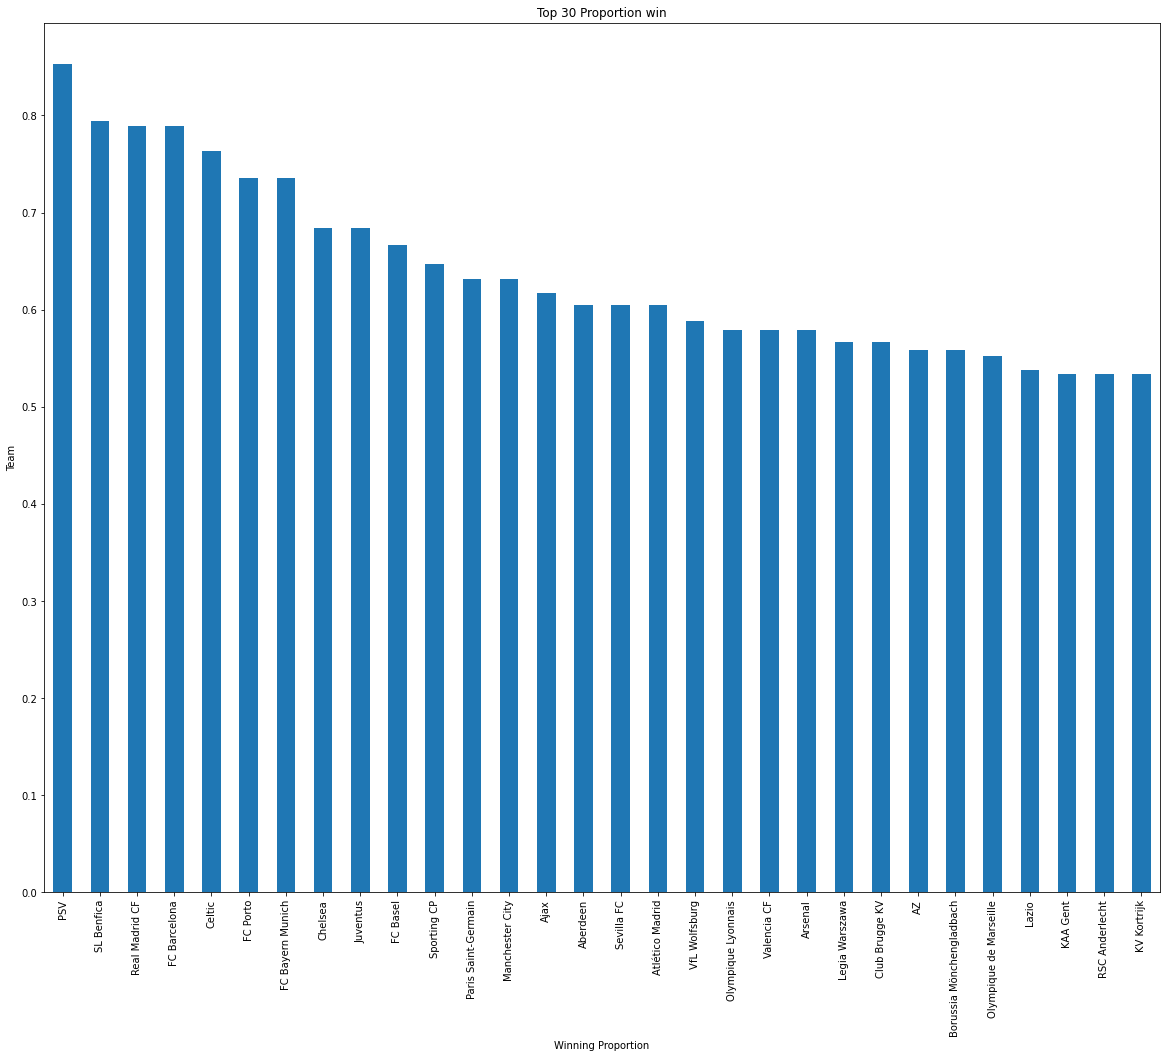

In [1330]:
# Percentage of matches won
home_winsp = df_match.groupby('home_team_name')['W1'].mean()
away_winsp = df_match.groupby('away_team_name')['W2'].mean()

# away_wins['Juventus']
winsp = (home_winsp+away_winsp)/2

winsp.sort_values(ascending=False).head(30).plot(kind='bar',figsize=(20,16))
plt.title('Top 30 Proportion win')
plt.xlabel('Winning Proportion')
plt.ylabel('Team')


In [1331]:
winsp['PSV']*100

85.29411764705883

> * PSV has a winning proportion of 85.294%.
> * The winning proportion is determined as the percentage of matches won on the matches played. This shows that the highest winning team isn't necessarily the strongest 
> * Refereing on the results we obtained above, we can see that, some teams have more wins because they, played more matches.

### Research Question 2  (Does playing home increases the chances of winning in the season 2014/2015?)

In [1332]:
homep = (home_winsp.sum()/home_winsn.shape[0])*100
awayp = (away_winsp.sum()/away_winsn.shape[0])*100

([<matplotlib.patches.Wedge at 0x21e3b6eb7f0>,
 [Text(-0.35516003079809444, 1.0410866210472098, 'Home Win(W1)'),
  Text(0.3551600307980947, -1.0410866210472098, 'Away Win(W2)')],
 [Text(-0.19372365316259693, 0.5678654296621144, '60.5%'),
  Text(0.1937236531625971, -0.5678654296621144, '39.5%')])

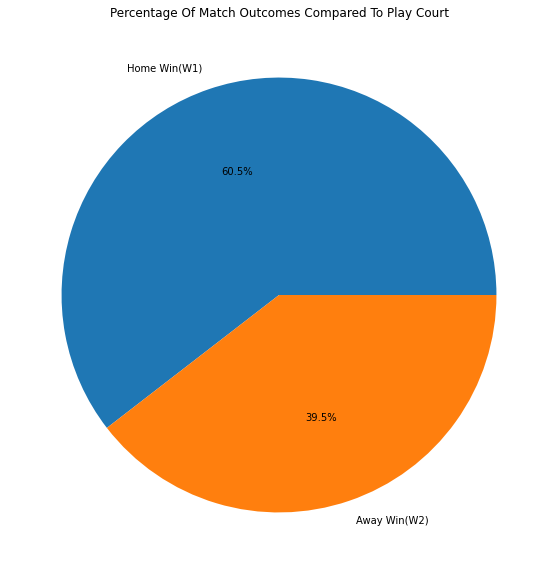

In [1333]:
plt.figure(figsize=(10,10))
plt.title('Percentage Of Match Outcomes Compared To Play Court')
labels = ['Home Win(W1)', 'Away Win(W2)']
plt.pie([homep, awayp], autopct='%1.1f%%',labels=labels)

* The pie chart shows that 60.5% of matches were won while having the home court advantage. And 39.5% Away

### Research Question 3  (What is the highest rated team?)

> * Now let's see if the overall rating of players in a team affects the outcome of a match.
   > * For every match, we will calculate the average rating of the players in each team and analyse how the ratings affect the outcomes of the matches.

In [1334]:
df_player['overall_rating'].describe()

count    8523.000000
mean       67.796583
std         6.285409
min        46.000000
25%        63.800000
50%        67.588235
75%        72.000000
max        93.400000
Name: overall_rating, dtype: float64

In [1335]:
# Function to replace the home players with their ratings
def findRating(id):
    if not math.isnan(id) :
        d = df_player.loc[df_player['player_api_id']==id]
        if not d.empty:
            return d['overall_rating'].item()
        else:
            return 0.0
    else:
        return 0.0

In [1336]:
# make a copy of the match and get the ratings of the players
matches_with_ratings = df_match

for i in range(1,12):
    matches_with_ratings['home_player_{}'.format(i)] = matches_with_ratings.apply(lambda row: findRating(row['home_player_{}'.format(i)]), axis=1)

for i in range(1,12):
    matches_with_ratings['away_player_{}'.format(i)] = matches_with_ratings.apply(lambda row: findRating(row['away_player_{}'.format(i)]), axis=1)


In [1337]:
# Get the home and away ratings and calculate the mean match wise.
hr = []
ar = []
for i in range(1,12):
    hr.append('home_player_{}'.format(i))
for i in range(1,12):
    ar.append('away_player_{}'.format(i))

# matches_with_ratings[hr]
df_match['home_player_average_ratings'] = matches_with_ratings[hr].mean(axis=1)
df_match['away_player_average_ratings'] = matches_with_ratings[ar].mean(axis=1)
print(hr)
df_pmatch = df_match.drop(columns=hr, axis=1, inplace=False)
df_pmatch.drop(columns=ar, axis=1, inplace=True)
df_pmatch

['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11']


,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,home_team_name,away_team_name,W1,W2,X,home_player_average_ratings,away_player_average_ratings
0,1249,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,0,Belgium Jupiler League,Belgium,Standard de Liège,Sporting Charleroi,1,0,0,69.832694,66.127620
1,1250,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,2,Belgium Jupiler League,Belgium,Waasland-Beveren,Club Brugge KV,0,1,0,65.399856,71.431010
2,1251,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,0,Belgium Jupiler League,Belgium,KSV Cercle Brugge,KAA Gent,0,0,1,64.486472,67.800607
3,1252,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,0,Belgium Jupiler League,Belgium,Lierse SK,KV Oostende,1,0,0,64.326115,66.691001
4,1253,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,0,Belgium Jupiler League,Belgium,KVC Westerlo,Sporting Lokeren,1,0,0,65.510895,63.718723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,25795,2014/2015,9,2014-09-23 00:00:00,1717254,9931,9824,3,1,Switzerland Super League,Switzerland,FC Basel,FC Vaduz,1,0,0,71.198504,59.316492
3321,25796,2014/2015,9,2014-09-23 00:00:00,1717255,10191,10199,3,2,Switzerland Super League,Switzerland,FC Thun,FC Luzern,1,0,0,62.353739,63.748676
3322,25797,2014/2015,9,2014-09-24 00:00:00,1717256,10190,9956,3,0,Switzerland Super League,Switzerland,FC St. Gallen,Grasshopper Club Zürich,1,0,0,61.482833,66.743325
3323,25798,2014/2015,9,2014-09-24 00:00:00,1717257,10243,9930,0,0,Switzerland Super League,Switzerland,FC Zürich,FC Aarau,0,0,1,66.385988,59.977273


> * Above we have the average rating of all the players in the home team and in the away team. We will use it to find out if the ratings affect the outcomes of the matches

In [1338]:
ph_avg_ratings = df_pmatch.groupby('home_team_name')['home_player_average_ratings'].mean()
pa_avg_ratings = df_pmatch.groupby('away_team_name')['away_player_average_ratings'].mean()
avg_ratings = (ph_avg_ratings+pa_avg_ratings)/2
avg_ratings

home_team_name
1. FC Köln                  72.335113
1. FSV Mainz 05             73.066036
ADO Den Haag                67.781713
AS Monaco                   76.201336
AS Saint-Étienne            75.466009
                              ...    
Willem II                   66.688753
Wisła Kraków                65.013701
Zawisza Bydgoszcz           56.814145
Évian Thonon Gaillard FC    68.810599
Śląsk Wrocław               63.344432
Length: 188, dtype: float64

Text(0, 0.5, 'Rating')

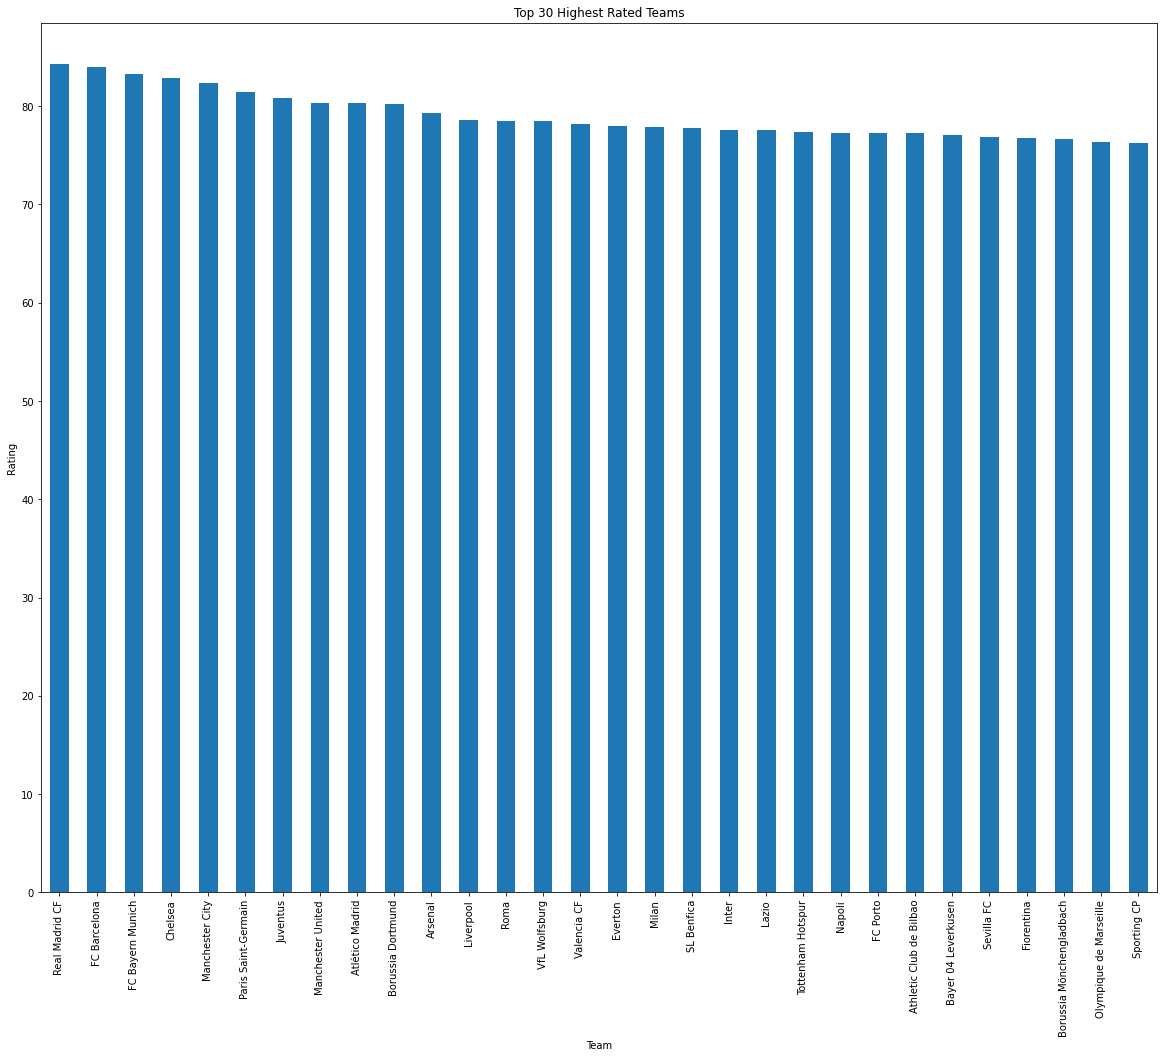

In [1339]:
avg_ratings.sort_values(ascending=False).head(30).plot(kind='bar',figsize=(20,16))
plt.title('Top 30 Highest Rated Teams')
plt.xlabel('Team')
plt.ylabel('Rating')


> * We can see from the above plot that the highest rated team is Real Madrid with a rating of 84.27

### Research Question 3  (What is the a correlation between the rating and the performance of the team overall in the season 2014/2015?)

In [1340]:
# Relation ship between the ratings and  number wins
hrw = df_pmatch.groupby('home_team_name')['W1', 'W2', 'home_player_average_ratings'].agg({'W1':'sum', 'home_player_average_ratings':'mean'})
hrw['w'] = hrw['W1']
hrw['team_avg_ratings'] = hrw['home_player_average_ratings']
hrw.drop(columns=['W1', 'home_player_average_ratings'], axis=1, inplace=True)
hrw.rename(columns={'home_team_name':'team_name'}, inplace=True)
hrw


C:\Users\Grimm\AppData\Local\Temp\ipykernel_24236\4269436861.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hrw = df_pmatch.groupby('home_team_name')['W1', 'W2', 'home_player_average_ratings'].agg({'W1':'sum', 'home_player_average_ratings':'mean'})


,w,team_avg_ratings
home_team_name,,
1. FC Köln,4,72.313698
1. FSV Mainz 05,6,73.083800
ADO Den Haag,8,67.752575
AS Monaco,8,75.876614
AS Saint-Étienne,12,75.554763
...,...,...
Willem II,8,66.695650
Wisła Kraków,6,65.180029
Zawisza Bydgoszcz,5,56.352031


In [1341]:

arw = df_pmatch.groupby('away_team_name')['W2', 'away_player_average_ratings'].agg({'W2':'sum', 'away_player_average_ratings':'mean'})
arw['w'] = arw['W2']
arw['team_avg_ratings'] = arw['away_player_average_ratings']
arw.drop(columns=['W2', 'away_player_average_ratings'], axis=1, inplace=True)
arw.rename(columns={'home_team_name':'team_name'}, inplace=True)

rw = arw+hrw
rw['team_avg_ratings'] = rw['team_avg_ratings']/2

rw

C:\Users\Grimm\AppData\Local\Temp\ipykernel_24236\3079508782.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  arw = df_pmatch.groupby('away_team_name')['W2', 'away_player_average_ratings'].agg({'W2':'sum', 'away_player_average_ratings':'mean'})


,w,team_avg_ratings
away_team_name,,
1. FC Köln,9,72.335113
1. FSV Mainz 05,9,73.066036
ADO Den Haag,9,67.781713
AS Monaco,20,76.201336
AS Saint-Étienne,19,75.466009
...,...,...
Willem II,13,66.688753
Wisła Kraków,11,65.013701
Zawisza Bydgoszcz,8,56.814145


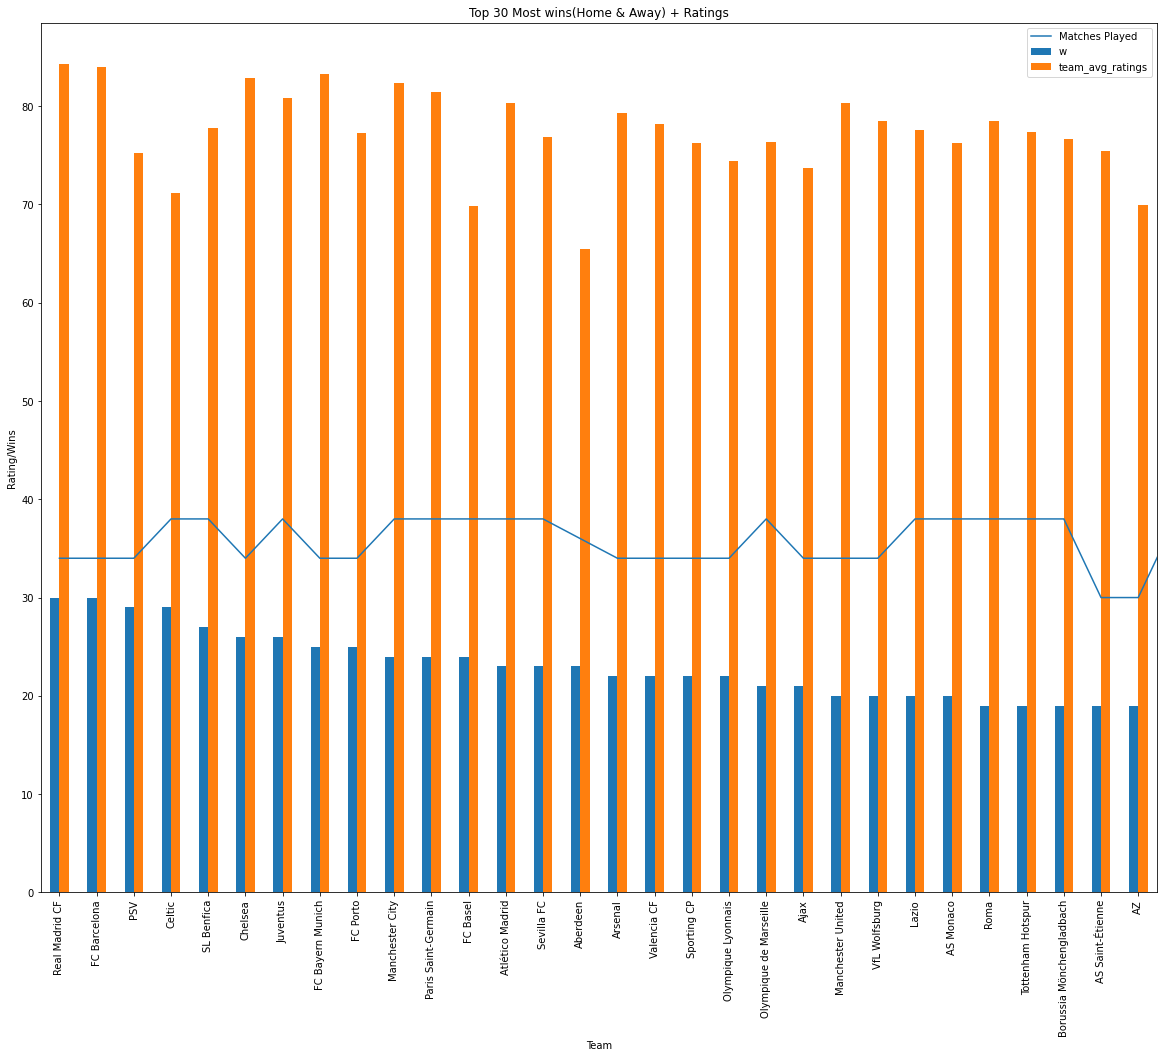

In [1342]:
ax = matches_played.plot(kind='line', label='Matches Played')
rw.sort_values(by=['w', 'team_avg_ratings'],ascending=False).head(30).plot(kind='bar', ax=ax, figsize=(20,16))


plt.title('Top 30 Most wins(Home & Away) + Ratings')
plt.xlabel('Team')
plt.ylabel('Rating/Wins')
ax.legend()
plt.show()

<h5><font color='blue'>Observations</font></h5>

> * We see from this plot that the highest winning team is not necessarily the highest rated team. Take a look at PSV, it is rated lower than Chelsea but it has won more.

In [1343]:
# Relationship between the ratings and portions of wins
phrw = df_pmatch.groupby('home_team_name')['W1', 'W2', 'home_player_average_ratings'].agg({'W1':'mean', 'home_player_average_ratings':'mean'})
phrw['w'] = phrw['W1']
phrw['team_avg_ratings'] = phrw['home_player_average_ratings']
phrw.drop(columns=['W1', 'home_player_average_ratings'], axis=1, inplace=True)
phrw.rename(columns={'home_team_name':'team_name'}, inplace=True)
phrw


C:\Users\Grimm\AppData\Local\Temp\ipykernel_24236\3398521819.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  phrw = df_pmatch.groupby('home_team_name')['W1', 'W2', 'home_player_average_ratings'].agg({'W1':'mean', 'home_player_average_ratings':'mean'})


,w,team_avg_ratings
home_team_name,,
1. FC Köln,0.235294,72.313698
1. FSV Mainz 05,0.352941,73.083800
ADO Den Haag,0.470588,67.752575
AS Monaco,0.421053,75.876614
AS Saint-Étienne,0.631579,75.554763
...,...,...
Willem II,0.470588,66.695650
Wisła Kraków,0.400000,65.180029
Zawisza Bydgoszcz,0.333333,56.352031


In [1346]:
parw = df_pmatch.groupby('away_team_name')['W2', 'away_player_average_ratings'].agg({'W2':'mean', 'away_player_average_ratings':'mean'})
parw['w'] = parw['W2']
parw['team_avg_ratings'] = parw['away_player_average_ratings']
parw.drop(columns=['W2', 'away_player_average_ratings'], axis=1, inplace=True)
parw.rename(columns={'home_team_name':'team_name'}, inplace=True)

prw = parw+phrw
prw['team_avg_ratings'] = prw['team_avg_ratings']/2

prw

C:\Users\Grimm\AppData\Local\Temp\ipykernel_24236\3770641368.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  parw = df_pmatch.groupby('away_team_name')['W2', 'away_player_average_ratings'].agg({'W2':'mean', 'away_player_average_ratings':'mean'})


,w,team_avg_ratings
away_team_name,,
1. FC Köln,0.529412,72.335113
1. FSV Mainz 05,0.529412,73.066036
ADO Den Haag,0.529412,67.781713
AS Monaco,1.052632,76.201336
AS Saint-Étienne,1.000000,75.466009
...,...,...
Willem II,0.764706,66.688753
Wisła Kraków,0.733333,65.013701
Zawisza Bydgoszcz,0.533333,56.814145


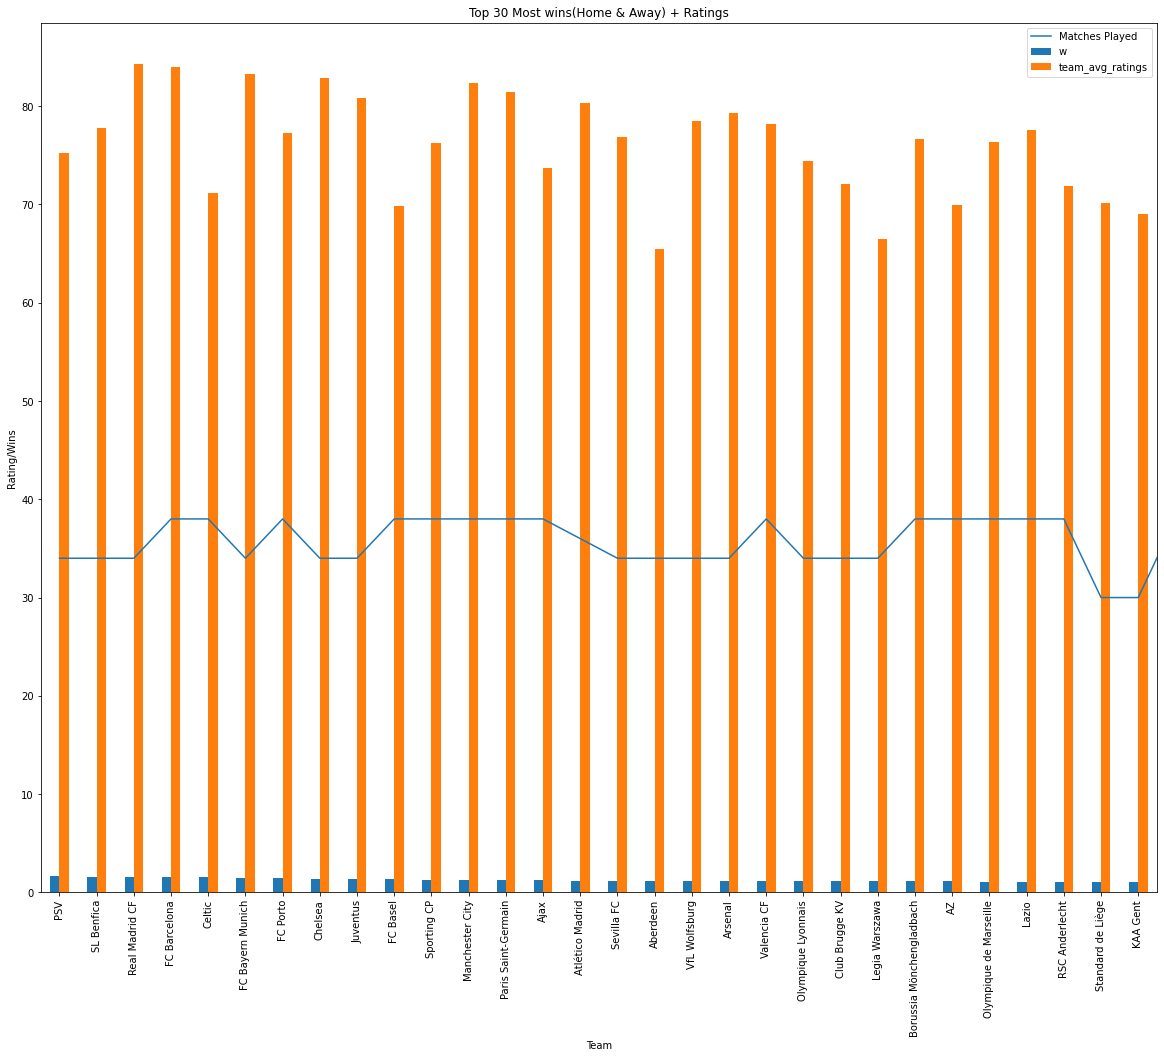

In [1347]:
ax = matches_played.plot(kind='line', label='Matches Played')
prw.sort_values(by=['w', 'team_avg_ratings'],ascending=False).head(30).plot(kind='bar', ax=ax, figsize=(20,16))


plt.title('Top 30 Most wins(Home & Away) + Ratings')
plt.xlabel('Team')
plt.ylabel('Rating/Wins')
ax.legend()
plt.show()

> * From this plot we can see that some other teams end up on top even though they have lower ratings. Thus, the most efficient team is not necessarilly the highest rated team.

<a id='conclusions'></a>
## Conclusions


1.  Which team dominated the standings overall in the season 2014/2015?
* FC Barcelona and Real Madrid CF each had 30 wins during the season. However, the fact that Barcelona had less losses, makes them the team who dominated the standings overall.

2.  Does playing home increases the chances of winning in the season 2014/2015?
* From the findings above, we saw that teams won 60.5% of the time at home and 39.5% of the time away. So we can definitevly say that playing at home increases the chances of winning.

3.  What is the highest rated team?
* The highest rated team for the season is Real Madrid with a rating of 84.27. They have the best overall ratings for their players.

4.  Is the a correlation between the rating and the performance of the team overall in the season 2014/2015?
* From the results we obtained above, we can definitely see that there is a strong positive correlation between the rating and the performance of the team overall. The highest rated teams are also high performers here. This is because, the best teams are capable of playing the most games at a with a higher output than others. That's why the are the best performers. Some of the teams like PSV are high in placement when we use percentages because, they played less games and were efficient with their wins. Even though they are not as high rated as others. In some seasons, teams like this could be the highest performing team.

## Final Thoughts and Limitations
* We started the project by extracting the data from a SQL database,we established appropriate questions, we then proceeded to clean the data, then we wrangled the data and performed an Exploratory Data Analysis.
* The dataset is not complete yet and contains a lot of missing information. Finding the documentation to work with it needed a lot of work, However, it was very engaging to investigate. Every detail of the process has been noted in the cells above and these results have been verified with the official results for the 2014/2015 season.